In [1]:
path_figure = '/Users/lsimpson/Desktop/GitHub/Figures/'
from classo import *
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Combo data

Combettes, P. L. and Müller, C. L. (2020). Regression models for compositional data: Gen- eral log-contrast formulations, proximal optimization, and microbiome data applications. Statistics in Biosciences, pages 1–26.:

"The data set comprises the log-transformed relative abundances of p = 87 taxa at the genus level across n = 96 healthy subjects. Following previous analyses, we investigate the relationship between BMI and the microbial compositions in a log-contrast regression framework."

## Building matrices 

In [2]:
path = path_figure + 'exampleCOMBO/'
X0  = csv_to_np('COMBO_data/complete_data/GeneraCounts.csv',begin=0).astype(float)
X_C = csv_to_np('COMBO_data/CaloriData.csv',begin=0).astype(float)
X_F = csv_to_np('COMBO_data/FatData.csv',begin=0).astype(float)
y   = csv_to_np('COMBO_data/BMI.csv',begin=0).astype(float)[:,0]
labels  = csv_to_np('COMBO_data/complete_data/GeneraPhylo.csv').astype(str)[:,-1]

y   = y - np.mean(y) #BMI data (n=96)
X_C = X_C - np.mean(X_C, axis=0)  #Covariate data (Calorie)
X_F = X_F - np.mean(X_F, axis=0)  #Covariate data (Fat)
X0 = clr(X0, 1 / 2).T

X      = np.concatenate((X0, X_C, X_F, np.ones((len(X0), 1))), axis=1) # Joint microbiome and covariate data and offset
label = np.concatenate([labels,np.array(['Calorie','Fat','Bias'])])
C = np.ones((1,len(X[0])))
C[0,-1],C[0,-2],C[0,-3] = 0.,0.,0.

X.shape

(96, 90)

## Create classo instance and change parameters 

In [3]:
problem = classo_problem(X,y,C, label=label)

problem.model_selection.LAMfixed                    = True
problem.model_selection.StabSelparameters.method      = 'lam'
problem.model_selection.StabSelparameters.threshold_label = 0.5
problem.model_selection.PATH = True

## R1

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.021
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

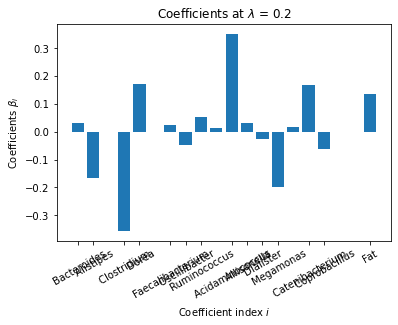

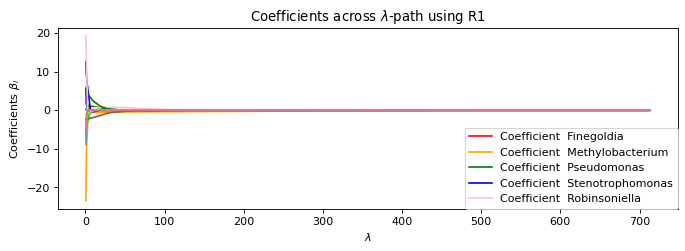

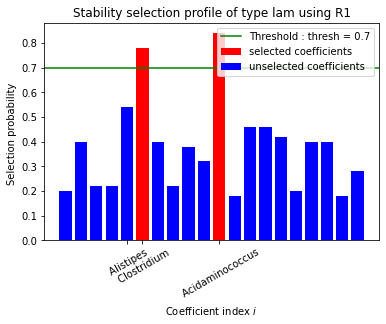

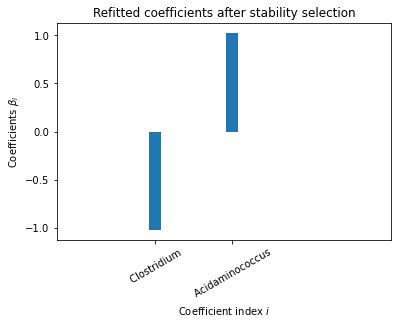


 LAMBDA FIXED : 
   Selected variables :   Bacteroides     Alistipes     Clostridium     Dorea     Faecalibacterium     Oscillibacter     Ruminococcus     Acidaminococcus     Allisonella     Dialister     Megamonas     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.007s

 PATH COMPUTATION : 
   Running time :  0.14s

 STABILITY SELECTION : 
   Selected variables :   Olsenella     Odoribacter    
   Running time :  0.314s



In [4]:
problem.formulation.concomitant = False
problem.solve()
problem.solution.PATH.save = path+'R1-'
problem.solution.StabSel.save1 = path+'R1-StabSel'
problem.solution.StabSel.save2 = path+'R1-StabSel-beta'
print(problem, problem.solution)

## R2

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.021
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

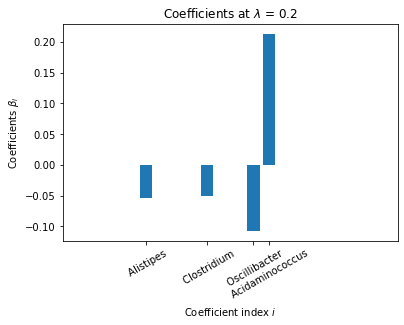

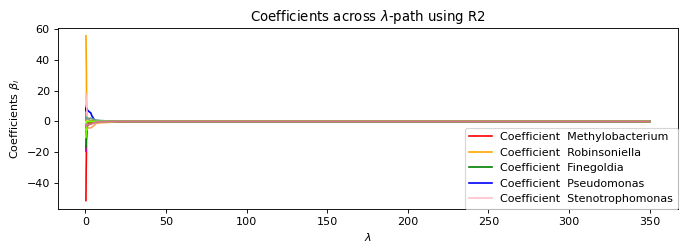

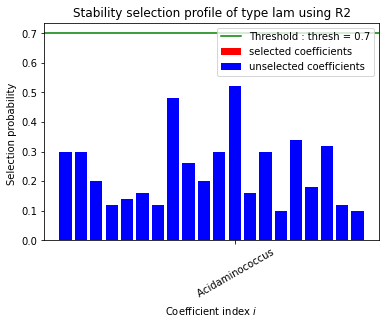

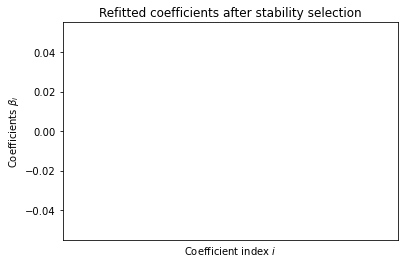


 LAMBDA FIXED : 
   Selected variables :   Alistipes     Clostridium     Oscillibacter     Acidaminococcus    
   Running time :  0.023s

 PATH COMPUTATION : 
   Running time :  0.409s

 STABILITY SELECTION : 
   Selected variables :  
   Running time :  0.685s



In [5]:
problem.formulation.huber = True
problem.solve()

problem.solution.PATH.save = path+'R2-'
problem.solution.StabSel.save1 = path+'R2-StabSel'
problem.solution.StabSel.save2 = path+'R2-StabSel-beta'
print(problem, problem.solution)

## R3

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.021
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

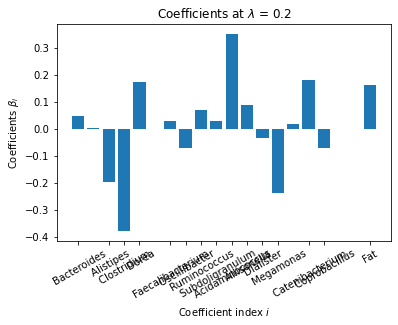

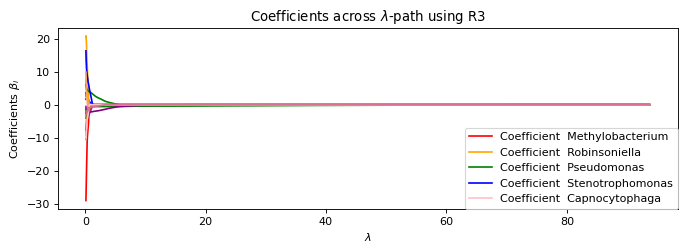

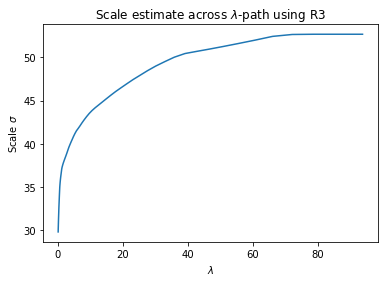

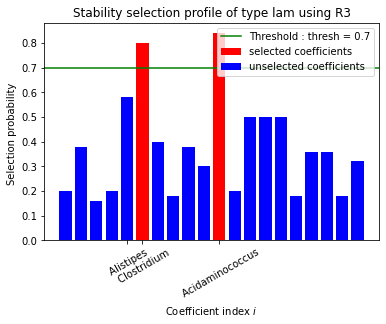

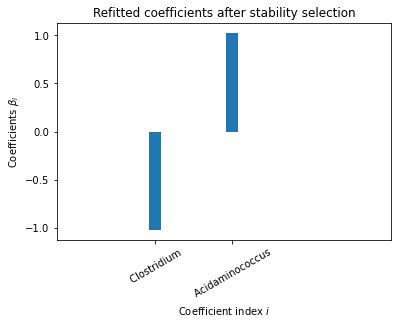


 LAMBDA FIXED : 
   Sigma  =  0.964
   Selected variables :   Bacteroides     Alistipes     Clostridium     Dorea     Faecalibacterium     Oscillibacter     Ruminococcus     Subdoligranulum     Acidaminococcus     Allisonella     Dialister     Megamonas     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.008s

 PATH COMPUTATION : 
   Running time :  0.118s

 STABILITY SELECTION : 
   Selected variables :   Olsenella     Odoribacter    
   Running time :  0.344s



In [6]:
problem.formulation.concomitant = True
problem.formulation.huber = False


problem.solve()
problem.solution.PATH.save = path+'R3-'
problem.solution.StabSel.save1 = path+'R3-StabSel'
problem.solution.StabSel.save2 = path+'R3-StabSel-beta'
print(problem, problem.solution)

## R4

 
 
FORMULATION: R4
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.021
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

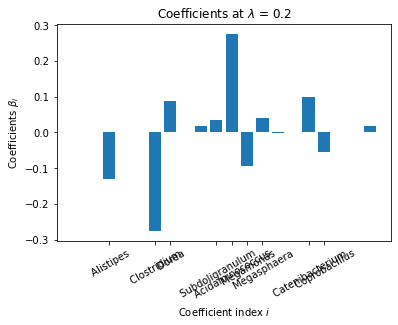

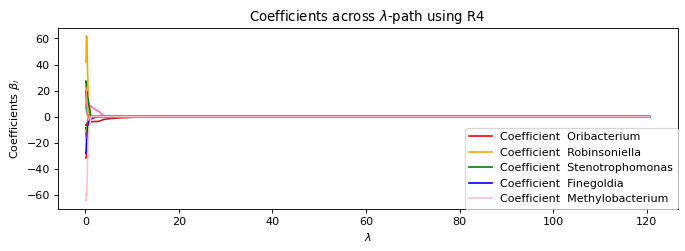

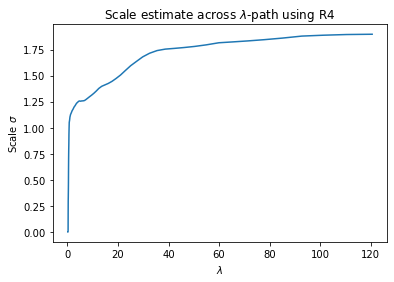

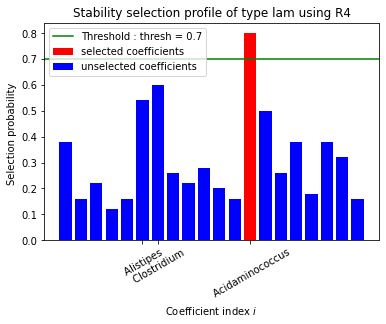

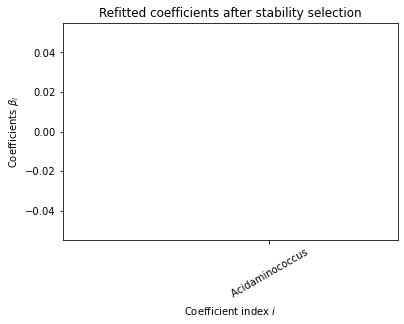


 LAMBDA FIXED : 
   Sigma  =  3.176
   Selected variables :   Alistipes     Clostridium     Dorea     Subdoligranulum     Acidaminococcus     Megamonas     Megasphaera     Catenibacterium     Coprobacillus    
   Running time :  0.018s

 PATH COMPUTATION : 
   Running time :  355.008s

 STABILITY SELECTION : 
   Selected variables :   Porphyromonas    
   Running time :  0.592s



In [7]:
problem.formulation.huber = True
problem.model_selection.StabSelparameters.seed = 123
problem.solve()
problem.solution.PATH.save = path+'R4-'
problem.solution.StabSel.save1 = path+'R4-StabSel'
problem.solution.StabSel.save2 = path+'R4-StabSel-beta'
print(problem, problem.solution)

# Filtered Combo data

In [2]:
path = path_figure + 'exampleFilteredCOMBO/'

# Load microbiome and covariate data X
X_C = csv_to_np('COMBO_data/CaloriData.csv',begin=0).astype(float)
X_F = csv_to_np('COMBO_data/FatData.csv',begin=0).astype(float)
X0  = csv_to_np('COMBO_data/filtered_data/GeneraFilteredCounts.csv',begin=0).astype(float)


# Load BMI measurements y
y   = csv_to_np('COMBO_data/BMI.csv',begin=0).astype(float)[:,0]

# Load genus and covariate labels
labels  = csv_to_np('COMBO_data/filtered_data/GeneraFilteredPhylo.csv').astype(str)[:,-1]


# Normalize/transform data
y   = y - np.mean(y) #BMI data (n=96)
X_C = X_C - np.mean(X_C, axis=0)  #Covariate data (Calorie)
X_F = X_F - np.mean(X_F, axis=0)  #Covariate data (Fat)
X0 = clr(X0, 1 / 2).T

# Set up design matrix and zero-sum constraints for 45 genera
X      = np.concatenate((X0, X_C, X_F, np.ones((len(X0), 1))), axis=1) # Joint microbiome and covariate data and offset
label = np.concatenate([labels,np.array(['Calorie','Fat','Bias'])])
C = np.ones((1,len(X[0])))
C[0,-1],C[0,-2],C[0,-3] = 0.,0.,0.

# Set up c-lassso problem
problem = classo_problem(X,y,C, label=label)

# Use stability selection with theoretical lambda [Combettes & Müller, 2020b]
problem.model_selection.StabSel                       = True
problem.model_selection.StabSelparameters.method      = 'lam'
problem.model_selection.StabSelparameters.seed     = 2


In [3]:
# Use formulation R3
problem.formulation.concomitant = True

problem.solve()

In [4]:
problem.solution.StabSel.save1 = path+'R3-StabSel'
problem.solution.StabSel.save2 = path+'R3-StabSel-beta'

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Stability selection
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2504



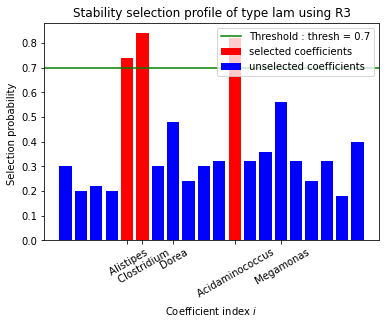

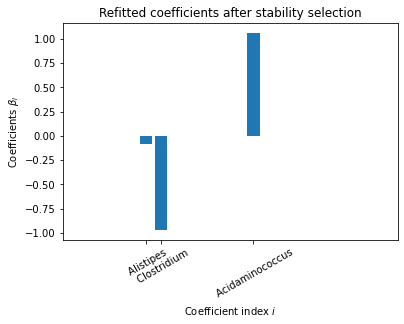


 STABILITY SELECTION : 
   Selected variables :   Butyricimonas     Odoribacter     Granulicatella    
   Running time :  0.3s



In [5]:
print(problem)
print(problem.solution)

In [6]:
# Use formulation R4
problem.formulation.huber = True
problem.formulation.concomitant = True

problem.solve()

In [7]:
problem.solution.StabSel.save1 = path+'R4-StabSel'
problem.solution.StabSel.save2 = path+'R4-StabSel-beta'

 
 
FORMULATION: R4
 
MODEL SELECTION COMPUTED:  
     Stability selection
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2504



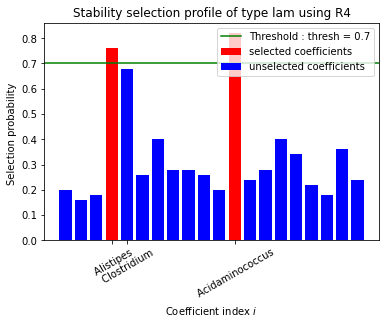

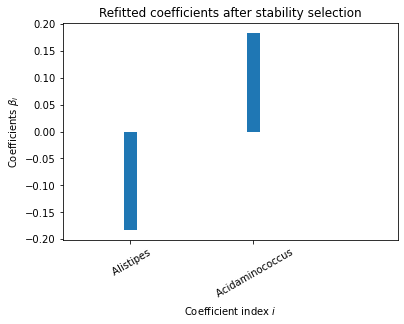


 STABILITY SELECTION : 
   Selected variables :   Barnesiella     Granulicatella    
   Running time :  0.434s



In [8]:
print(problem)
print(problem.solution)

# pH data

## Building matrices 

In [9]:
path = path_figure + 'examplepH/'
pH = sio.loadmat('pH_data/pHData.mat')
tax = sio.loadmat('pH_data/taxTablepHData.mat')['None'][0]

X,Y_uncent = pH['X'],pH['Y'].T[0]
y = Y_uncent-np.mean(Y_uncent) # Center Y

X.shape

(88, 116)

## Create classo instance and change parameters 

In [12]:
problem = classo_problem(X,y)

#problem.model_selection.LAMfixed                    = True
problem.model_selection.StabSelparameters.method      = 'lam'
problem.model_selection.PATH = True
problem.model_selection.LAMfixed = True

## R1

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.004
     lam : theoretical
     theoretical_lam = 0.2182
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.3085
 

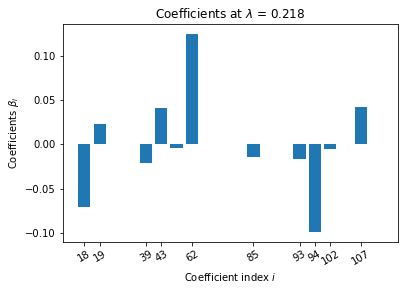

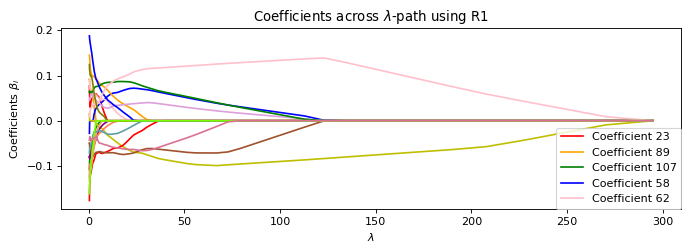

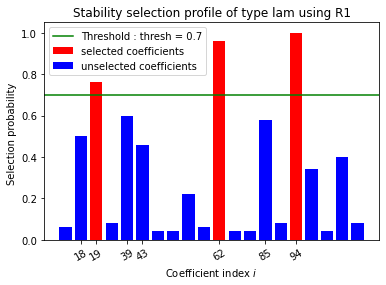

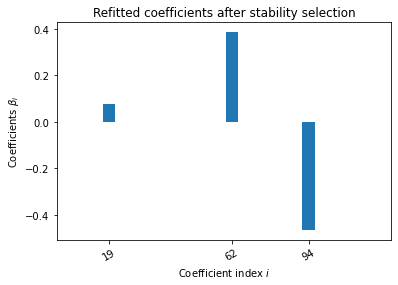


 LAMBDA FIXED : 
   Selected variables :  18    19    39    43    62    85    93    94    102    107    
   Running time :  0.01s

 PATH COMPUTATION : 
   Running time :  0.156s

 STABILITY SELECTION : 
   Selected variables :  2    10    15    
   Running time :  0.283s



In [13]:
problem.formulation.concomitant = False
problem.solve()
problem.solution.PATH.save = path+'R1-'
problem.solution.StabSel.save1 = path+'R1-StabSel'
problem.solution.StabSel.save2 = path+'R1-StabSel-beta'
problem.solution.LAMfixed.save = path+'R1-beta'
print(problem, problem.solution)

## R2

In [ ]:
problem.formulation.huber = True
problem.solve()
print(problem, problem.solution)

## R3

In [ ]:
problem.formulation.concomitant = True
problem.formulation.huber = False

problem.solve()
print(problem, problem.solution)

## R4

In [ ]:
problem.formulation.huber = True
problem.solve()
print(problem, problem.solution)

# Tara data

Bien, J., Yan, X., Simpson, L. and Müller, C. (2020). Tree-Aggregated Predictive Modeling of Microbiome Data : 

"Integrative marine data collection efforts such as Tara Oceans (Sunagawa et al., 2020) or the Simons CMAP (https://simonscmap.com) provide the means to investigate ocean ecosystems on a global scale. Using Tara’s environmental and microbial survey of ocean surface water (Sunagawa, 2015), we next illustrate how trac can be used to globally connect environmental covariates and the ocean microbiome. As an example, we learn a global predictive model of ocean salinity from n = 136 samples and p = 8916 miTAG OTUs (Logares et al., 2014). trac identifies four taxonomic aggregations, the kingdom bacteria and the phylum Bacteroidetes being negatively associated and the classes Alpha and Gammaproteobacteria being positively associated with marine salinity (see Figure 7 lower panel). Figure 7 shows the scatter plot of salinity measurements vs. trac model predictions (with correlation on the out-of-sample test set of 0.55)."

## Building matrices 

###  importing data

In [ ]:
path = path_figure + 'exampleTara/'
# import rpy2's package module
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import r

In [ ]:
#utils = rpackages.importr('utils')    # this code code be used in order to import R library Matrix
#utils.chooseCRANmirror(ind=1) #
#utils.install_packages('Matrix')
#importr('Matrix')

Open R file tara_sal_processed.RDS

In [ ]:
pandas2ri.activate()
file = 'Tara/tara_sal_processed.RDS'
readRDS = robjects.r['readRDS']
rds = readRDS(file)
rds = pandas2ri.ri2py(rds)
D = dict({name:rds.rx(name)[0] for name in rds.names})

rA = r["as.matrix"](D["A"])
x,y, A = np.array(D['x']),np.array(D['y']), np.array(rA)

In [ ]:
label_OTU = D['x'].colnames
label_sample = D['x'].rownames
label_nodes = np.array(list(rA.colnames))
label_short = [l.split("::")[-1] for l in label_nodes]
print(y.shape)
print(x.shape)
print(A.shape)

### process similar to 2fit_trac_model.R

In [ ]:
# first need to load "tara_sal_trac.Rdata" in order to extract training set we are using
r['load']("Tara/tara_sal_trac.RData")

In [ ]:
cvfit = r["cvfit"]
cv = cvfit.rx("cv")
lambda_1SE = cv.rx("lambda_1se")

In [ ]:
lambda_1SE

In [ ]:
tr = np.array(r['tr']) - 1  # python index starts at 0 when R index starts at 1
te = np.array([i for i in range(len(y)) if not i in tr])

In [ ]:
len(tr)

### process similar to trac 

In [ ]:
pseudo_count = 1
X = np.log(pseudo_count+x)
nleaves = np.sum(A,axis=0)
logGeom = X.dot(A)/nleaves

## Create classo instance and change parameters 

In [ ]:
problem = classo_problem(logGeom[tr],y[tr], label=label_short)

problem.formulation.w = 1/nleaves
problem.formulation.intercept     = True
problem.formulation.concomitant = False

## Cross validation and Path Computation

### Computation 

In [ ]:
problem.model_selection.StabSel   = False
problem.model_selection.PATH   = True
problem.model_selection.CV   = True
problem.model_selection.CVparameters.seed = 6 # one could change logscale, Nsubset, oneSE
problem

In [ ]:
problem.solve()

In [ ]:
problem.solution.CV.save = path+'R1-CVbeta'
problem.solution.PATH.save = path+'R1-Path'

In [ ]:
len(problem.data.label)

In [ ]:
print(problem.solution)

In [ ]:
problem.solution.CV.graphic(logScale=True,save = path+'R1-CV')

In [ ]:
print("lambda_1SE : ",problem.solution.CV.lambda_1SE)
print("lambda_best : ", problem.solution.CV.lambda_min)

In [ ]:
selection = problem.solution.CV.selected_param[1:] # exclude the intercept
label_nodes[selection]

### Prediction plot

In [ ]:
alpha = problem.solution.CV.refit
yhat = logGeom[te].dot(alpha[1:])+alpha[0]

In [ ]:
M1,M2 = max(y[te]),min(y[te])
plt.plot(yhat,y[te],'bo', label='sample of the testing set')
plt.plot([M1,M2],[M1,M2],'k-',label="identity")
plt.xlabel('predictor yhat'),plt.ylabel('real y'), plt.legend()
plt.show()

## Stability Selection

### Computation 

In [ ]:
problem.model_selection.StabSel   = True
problem.model_selection.PATH   = False
problem.model_selection.CV   = False
# can change q, B, nS, method, threshold etc in problem.model_selection.StabSelparameters
problem

In [ ]:
problem.solve()

In [ ]:
problem.solution.StabSel.save1 = path+'R1-StabSel'
problem.solution.StabSel.save2 = path+'R1-StabSel-beta'

In [ ]:
problem.solution

In [ ]:
selection = problem.solution.StabSel.selected_param[1:] # exclude the intercept
label_nodes[selection]

### Prediction plot

In [ ]:
alpha = problem.solution.StabSel.refit
yhat = logGeom[te].dot(alpha[1:])+alpha[0]

In [ ]:
M1,M2 = max(y[te]),min(y[te])
plt.plot(yhat,y[te],'bo', label='sample of the testing set')
plt.plot([M1,M2],[M1,M2],'k-',label="identity")
plt.xlabel('predictor yhat'),plt.ylabel('real y'), plt.legend()
plt.show()